<a href="https://colab.research.google.com/github/act-moises/diplomado/blob/main/An%C3%A1lisis_data_y_limpieza_modV_p_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
pd.set_option("display.max_columns",40)

In [ ]:
# Para convertir algunas columnas con formato erronneo
def convert_to_seconds(time_str):
    try:
        # Convierte la cadena a un objeto de tiempo
        time_parts = list(map(int, time_str.split(':')))
        return pd.Timedelta(hours=time_parts[0], minutes=time_parts[1], seconds=time_parts[2]).total_seconds()
    except Exception as e:
        return None  # O manejar el error de otra manera

# Limpieza columnas

In [ ]:
uploaded = files.upload()
DF = pd.read_csv("DetailedHistory.csv")
DF.head(3)

Saving DetailedHistory.csv to DetailedHistory.csv


,Master SessionID,Dirección,Tipo de canal,Destino,Destination Description,Originator Name,Cola,Nombre de usuario,Equipo,PreQueue Time,Queue Time,Tiempo de conversación,Duración,Handle Time,Fecha de Contestar,Routing Time,Tiempo envoltura,Outbound Dialing Time,Hora de abandono,Hold Time,...,Text Message Delivery,Inbound Text Count,Outbound Text Count,Recording Expiration Date,Recording Opt Out,Solicitud de devolucion de llamada,Tiempo de devolución de llamada,Tiempo de transferencia,Discarded with No Response,Contestada dentro del ANS,reenviado,Negado,Disposiciones,notas,Follow Up Comments,Disconnect Type,Requeue Count,SessionID,Autor,Fecha de inicio
0,715640975-0-DNS0-4014697030@200.0.90.32,inbound,Call,+525588971444,NaN,NaN,NaN,NaN,NaN,00:00:05,00:00:00,00:00:00,00:00:05,00:00:00,NaN,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00,...,NaN,0,0,NaN,0,0,00:00:00,00:00:00,0,0,0,0,NaN,NaN,NaN,Remote,0,715640975-0-DNS0-4014697030@200.0.90.32,+525553664300,10/28/2024 05:49:53 AM
1,715641617-0-DNS0-4015002130@200.0.90.32,inbound,Call,+525588971444,NaN,NaN,NaN,NaN,NaN,00:00:03,00:00:00,00:00:00,00:00:03,00:00:00,NaN,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00,...,NaN,0,0,NaN,0,0,00:00:00,00:00:00,0,0,0,0,NaN,NaN,NaN,Remote,0,715641617-0-DNS0-4015002130@200.0.90.32,+525551745174,10/28/2024 05:54:58 AM
2,715642766-0-DNS0-4015547620@200.0.90.32,inbound,Call,+525588971444,NaN,NaN,NaN,NaN,NaN,00:00:24,00:00:00,00:00:00,00:00:24,00:00:00,NaN,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00,...,NaN,0,0,NaN,0,0,00:00:00,00:00:00,0,0,0,0,NaN,NaN,NaN,Local,0,715642766-0-DNS0-4015547620@200.0.90.32,+525553664300,10/28/2024 06:04:03 AM


In [ ]:
#Vemos originalmente con cuantos registros tenemos
df = DF.copy()
len(df)

1986

In [ ]:
#Aalizamos campos, en su mayoria distintos de fechas/tiempos, y buscamos columnas que de primera no nos arrojen información
df.isnull().sum().sort_values().tail(14)

,0
Handle Time,0
Disconnect Type,48
Código de finalización,692
Cola,719
Equipo,740
Nombre de usuario,740
Disposiciones,741
Fecha de Contestar,744
Recording Expiration Date,784
notas,1084


In [ ]:
# En principio podemos borrar 'Text Message Delivery' y 'Follow Up Comments', pero verificamos las dos anteriores
df['Destination Description'].value_counts()

,count
Destination Description,
Chat Principal CASIA,44


In [ ]:
df['Tipo de canal'].value_counts()

,count
Tipo de canal,
Call,1942
Chat,44


In [ ]:
df[['Tipo de canal','Destination Description']][df['Tipo de canal']=='Chat'].value_counts()

,,count
Tipo de canal,Destination Description,
Chat,Chat Principal CASIA,44


In [ ]:
df['Originator Name'].value_counts()

,count
Originator Name,
+525553229020,229
,36
+528341070180,32
+525534004042,15
+523112118910,7
+529616173200,7
+525588972100,3
200.68.150.94,2
supervisor2 mesacontrol,1


In [ ]:
# Vemos que 'Destination Description' tienen solo un valor que coincide con registros de 'Tipo de canal' Chat (los cuales no son de interés)
# Mientras que 'Originator Name' tiene valores telefonicos o de ip que no son necesarios para el análisis

# Nos quedamos con solo los registros que sean llamada, y eliminamos las columnas mencionadas con aterioridad
df = df[df['Tipo de canal']=='Call']
df = df.drop(['Tipo de canal','Text Message Delivery','Follow Up Comments','Destination Description','Originator Name'], axis=1)
df.head(1)

,Master SessionID,Dirección,Destino,Cola,Nombre de usuario,Equipo,PreQueue Time,Queue Time,Tiempo de conversación,Duración,Handle Time,Fecha de Contestar,Routing Time,Tiempo envoltura,Outbound Dialing Time,Hora de abandono,Hold Time,Completed Date,Código de finalización,Inbound Text Count,Outbound Text Count,Recording Expiration Date,Recording Opt Out,Solicitud de devolucion de llamada,Tiempo de devolución de llamada,Tiempo de transferencia,Discarded with No Response,Contestada dentro del ANS,reenviado,Negado,Disposiciones,notas,Disconnect Type,Requeue Count,SessionID,Autor,Fecha de inicio
0,715640975-0-DNS0-4014697030@200.0.90.32,inbound,+525588971444,NaN,NaN,NaN,00:00:05,00:00:00,00:00:00,00:00:05,00:00:00,NaN,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00,10/28/2024 05:49:58 AM,OfficeClosed,0,0,NaN,0,0,00:00:00,00:00:00,0,0,0,0,NaN,NaN,Remote,0,715640975-0-DNS0-4014697030@200.0.90.32,+525553664300,10/28/2024 05:49:53 AM


In [ ]:
#Los valores corresponden a algún tipo de ID (se elimina)
len(df['Master SessionID'].unique())

1814

In [ ]:
#Los distintos son solo dos y no afectan en el análisis (se elimina)
df['Dirección'].value_counts()

,count
Dirección,
inbound,1846
outbound,96


In [ ]:
# No hay variedad de valores (se elimina)
df['Equipo'].value_counts()

,count
Equipo,
Default,1203


In [ ]:
# Si es de utilidad, (se conserva)
df['Código de finalización'].value_counts()

,count
Código de finalización,
Delivered,1199
OfficeClosed,34
Abandoned,18


In [ ]:
# Univalor, (se elimina)
df['Inbound Text Count'].unique()

array([0])

In [ ]:
# Univalor, (se elimina)
df['Outbound Text Count'].unique()

array([0])

In [ ]:
# Univalor y no relevante para el análisis (se elimina)
df['Recording Expiration Date'].value_counts()

,count
Recording Expiration Date,
12/31/9999 05:59:59 PM,1202


In [ ]:
# Univalor, (se elimina)
df['Recording Opt Out'].unique()

array([0])

In [ ]:
# Univalor, (se elimina)
df['Solicitud de devolucion de llamada'].unique()

array([0])

In [ ]:
# Univalor y sin utilidad (se elimina)
df['Tiempo de devolución de llamada'].value_counts()

,count
Tiempo de devolución de llamada,
00:00:00,1942


In [ ]:
# Univalor, (se elimina)
df['Discarded with No Response'].unique()

array([0])

In [ ]:
# Creemos que hay una posible indicación de indicativo de llamdas realizadas, corroboramos con las celdas siguiente
df['Contestada dentro del ANS'].value_counts()

,count
Contestada dentro del ANS,
1,1144
0,798


In [ ]:
A = DF[['PreQueue Time','Tiempo de conversación','Contestada dentro del ANS']][DF['Contestada dentro del ANS']==0]['Tiempo de conversación'].value_counts().sum()
DF[['PreQueue Time','Tiempo de conversación','Contestada dentro del ANS']][DF['Contestada dentro del ANS']==0]['Tiempo de conversación'].value_counts()

,count
Tiempo de conversación,
00:00:00,741
00:11:18,2
00:02:14,2
00:01:21,2
00:04:38,2
...,...
00:07:10,1
00:15:40,1
00:08:13,1


In [ ]:
# Vemos una razonable relación con las llamadas no realizadas, (se elimina por redundancia)
len(DF[DF['PreQueue Time'] == '00:00:00']), len(DF[DF['Tiempo de conversación'] == '00:00:00']), A

(96, 741, 805)

In [ ]:
# Hay poca variedad y el encabezado no se intuye relevante (se elimina)
df['reenviado'].value_counts()

,count
reenviado,
0,1814
1,128


In [ ]:
# Hay poca variedad y el encabezado no se intuye relevante (se elimina)
df['Negado'].value_counts()

,count
Negado,
0,1936
1,6


In [ ]:
# Vemos distinción de valores irrelevante (se elimina)
df['Disconnect Type'].value_counts()

,count
Disconnect Type,
Remote,1710
Local,228


In [ ]:
# Univalor, (se elimina)
df['Requeue Count'].unique()

array([0])

In [ ]:
# Identificador (se elimina)
len(df['SessionID'].unique())

1942

In [ ]:
# Similar a 'Originator Name' (se elimina)
df['Autor'].value_counts()

,count
Autor,
+525553229020,231
monitor_6f37b8d7-745e-440a-b7a3-4892e7b194ef,88
+522281410430,62
+528181303100,46
+525553664300,45
...,...
+523173871303,1
+525563494613,1
+529992439159,1


In [ ]:
df = df.drop(['Master SessionID','Dirección', 'Destino','Equipo','Inbound Text Count', 'Outbound Text Count','Recording Expiration Date',
              'Recording Opt Out','Solicitud de devolucion de llamada', 'Tiempo de devolución de llamada','Discarded with No Response',
              'Contestada dentro del ANS', 'reenviado', 'Negado','Disconnect Type', 'Requeue Count', 'SessionID', 'Autor'], axis=1)
len(df),len(df.columns)

(1942, 19)

In [ ]:
df.columns= ['Mesas', 'Agente', 'Tiempo IVR', 'Tiempo en cola', 'Tiempo llamada','Duración', 'Handle Time', 'Fecha de Contestar', 'Traslado Agente','Tiempo envoltura',
             'Outbound Dialing Time', 'Hora de abandono','Tiempo encuesta', 'Completed Date', 'Código de finalización','Tiempo de transferencia', 'Disposiciones', 'Notas', 'Fecha de inicio']

In [ ]:
df.to_excel('HistoryCCN.xlsx', index=False)
files.download('HistoryCCN.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Limpieza registros

In [ ]:
uploaded = files.upload()
df = pd.read_excel("HistoryCCN.xlsx")
df.head(1)

Saving HistoryCCN.xlsx to HistoryCCN.xlsx


,Mesas,Agente,Tiempo IVR,Tiempo en cola,Tiempo llamada,Duración,Handle Time,Fecha de Contestar,Traslado Agente,Tiempo envoltura,Outbound Dialing Time,Hora de abandono,Tiempo encuesta,Completed Date,Código de finalización,Tiempo de transferencia,Disposiciones,Notas,Fecha de inicio
0,NaN,NaN,00:00:05,00:00:00,00:00:00,00:00:05,00:00:00,NaN,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00,10/28/2024 05:49:58 AM,OfficeClosed,00:00:00,NaN,NaN,10/28/2024 05:49:53 AM


In [ ]:
dx = df.copy()
dx['Tiempo IVR'] = pd.to_timedelta(dx['Tiempo IVR']).dt.total_seconds()
dx['Tiempo en cola'] = pd.to_timedelta(dx['Tiempo en cola']).dt.total_seconds()
dx['Tiempo llamada'] = pd.to_timedelta(dx['Tiempo llamada']).dt.total_seconds()
dx['Duración'] = pd.to_timedelta(dx['Duración']).dt.total_seconds()
dx['Handle Time'] = pd.to_timedelta(dx['Handle Time']).dt.total_seconds()
dx['Outbound Dialing Time'] = pd.to_timedelta(dx['Outbound Dialing Time']).dt.total_seconds()
dx['Hora de abandono'] = dx['Hora de abandono'].apply(convert_to_seconds)
dx['Tiempo encuesta'] = dx['Tiempo encuesta'].apply(convert_to_seconds)
dx['Tiempo de transferencia']  = dx['Tiempo de transferencia'].apply(convert_to_seconds)
dx.describe()

,Tiempo IVR,Tiempo en cola,Tiempo llamada,Duración,Handle Time,Outbound Dialing Time,Hora de abandono,Tiempo encuesta,Tiempo de transferencia
count,1942.000000,1942.000000,1942.000000,1942.000000,1942.000000,1942.000000,1942.000000,1942.000000,1942.000000
mean,55.277034,7.009269,267.683316,395.809990,278.046344,0.124614,0.919670,6.853759,36.646756
std,458.224677,34.124947,331.575337,734.456856,339.997710,1.519552,13.387451,37.206779,167.802388
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,0.000000,0.000000,36.250000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,2.000000,148.000000,280.500000,159.500000,0.000000,0.000000,0.000000,0.000000
75%,49.000000,4.000000,442.500000,586.000000,459.500000,0.000000,0.000000,0.000000,0.000000
max,19873.000000,589.000000,1754.000000,19873.000000,1940.000000,48.000000,337.000000,514.000000,1626.000000


In [ ]:
#Vemos que posiblemente solo tengamos un valor de outlier, ya que las demás meétricas llegan a un máximo de 30 min (alcanzable en una llamda)
print(19873/60,589/60,1756/60,1940/60,610/60,337/60,514/60,1626/60)

331.21666666666664 9.816666666666666 29.266666666666666 32.333333333333336 10.166666666666666 5.616666666666666 8.566666666666666 27.1


In [ ]:
#Elimino aquellos registros que tengan tanto tiempo de IVR y llamada 0, estos no representan un servicio y
#cada registro esta contabilizando una duración imposible (93 registros)
df = df[(df['Tiempo IVR']!='00:00:00') | (df['Tiempo llamada']!='00:00:00')]
len(df), 1942-93

(1849, 1849)

In [ ]:
df[df['Tiempo IVR']=='05:31:13']

,Mesas,Agente,Tiempo IVR,Tiempo en cola,Tiempo llamada,Duración,Handle Time,Fecha de Contestar,Traslado Agente,Tiempo envoltura,Outbound Dialing Time,Hora de abandono,Tiempo encuesta,Completed Date,Código de finalización,Tiempo de transferencia,Disposiciones,Notas,Fecha de inicio
1496,NaN,NaN,05:31:13,00:00:00,00:00:00,05:31:13,00:00:00,NaN,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00,10/30/2024 08:00:08 PM,NaN,00:00:00,NaN,NaN,10/30/2024 02:28:55 PM


In [ ]:
# Tras ver el registro con el tiempo de 5.5 hras en IVR notamos que si es un registro no útil (se elimina)
# Al ver los demás registros de puntos máximos todo esta en orden
df = df[df['Tiempo IVR']!='05:31:13']
len(df)

1848

In [ ]:
#Buscamos registros que tengan asignaciones inconsistestentes y por ello alteren las metricas que se sacaran para
#la construcción del modelo
df[(df['Mesas'].notna()) & (df['Agente'].isna())& (df['Código de finalización'].isna())]

,Mesas,Agente,Tiempo IVR,Tiempo en cola,Tiempo llamada,Duración,Handle Time,Fecha de Contestar,Traslado Agente,Tiempo envoltura,Outbound Dialing Time,Hora de abandono,Tiempo encuesta,Completed Date,Código de finalización,Tiempo de transferencia,Disposiciones,Notas,Fecha de inicio
131,CASIA - Mesa CAL,NaN,00:00:20,00:00:00,00:00:00,00:00:20,00:00:00,NaN,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00,10/28/2024 09:54:53 AM,NaN,00:00:00,NaN,NaN,10/28/2024 09:54:33 AM
666,Mesa Tecnica 2.0,NaN,00:00:03,00:00:00,00:00:00,00:00:03,00:00:00,NaN,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00,10/29/2024 09:56:08 AM,NaN,00:00:00,NaN,NaN,10/29/2024 09:56:05 AM
1296,Voz CASIA - Mesa de Servicio,NaN,00:00:04,00:00:00,00:00:00,00:00:04,00:00:00,NaN,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00,10/30/2024 11:08:10 AM,NaN,00:00:00,NaN,NaN,10/30/2024 11:08:05 AM
1941,CASIA - Mesa CAL,NaN,00:02:02,00:05:56,00:00:00,00:07:58,00:00:00,NaN,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00,10/28/2024 09:39:18 AM,NaN,00:00:00,NaN,NaN,10/28/2024 09:31:20 AM


Analizando los cuatro registros resultantes, vemos que los tres primeros no tienen sentido para su asignación de mesa, además que parecieran un tipo de llamada cortada/colgada. Por estás caracteristicas se seciden borrar manualmente desde Excel.

Resulta que en esta última limpieza, nos percatamos de asignaciones erroneas o faltantes en campos referentes al abandono de la llamada, así que lo corregimos y manualmete borramos su valor en mesa para que no interfiera con futuros calculos

In [ ]:
len(df)-3

1845

In [ ]:
df.loc[df['Completed Date'] == '10/28/2024 09:39:18 AM', ['Hora de abandono','Código de finalización']] = ['00:05:56','Abandoned']
df.loc[df['Completed Date'] == '10/28/2024 09:39:18 AM']

,Mesas,Agente,Tiempo IVR,Tiempo en cola,Tiempo llamada,Duración,Handle Time,Fecha de Contestar,Traslado Agente,Tiempo envoltura,Outbound Dialing Time,Hora de abandono,Tiempo encuesta,Completed Date,Código de finalización,Tiempo de transferencia,Disposiciones,Notas,Fecha de inicio
1941,CASIA - Mesa CAL,NaN,00:02:02,00:05:56,00:00:00,00:07:58,00:00:00,NaN,00:00:00,00:00:00,00:00:00,00:05:56,00:00:00,10/28/2024 09:39:18 AM,Abandoned,00:00:00,NaN,NaN,10/28/2024 09:31:20 AM


In [ ]:
df[df['Código de finalización'] == 'Abandoned'].head(3)

,Mesas,Agente,Tiempo IVR,Tiempo en cola,Tiempo llamada,Duración,Handle Time,Fecha de Contestar,Traslado Agente,Tiempo envoltura,Outbound Dialing Time,Hora de abandono,Tiempo encuesta,Completed Date,Código de finalización,Tiempo de transferencia,Disposiciones,Notas,Fecha de inicio
92,Voz CASIA - Mesa de Servicio,Saul Eduardo Jimenez Palomares,00:00:26,00:00:04,00:00:00,00:00:30,00:00:00,NaN,00:00:04,00:00:00,00:00:00,00:00:04,00:00:00,10/28/2024 09:19:32 AM,Abandoned,00:00:00,NaN,NaN,10/28/2024 09:19:02 AM
202,Voz CASIA - Mesa de Servicio,NaN,00:00:24,00:00:01,00:00:00,00:00:25,00:00:00,NaN,00:00:01,00:00:00,00:00:00,00:00:01,00:00:00,10/28/2024 11:03:54 AM,Abandoned,00:00:00,NaN,NaN,10/28/2024 11:03:29 AM
746,CASIA - Mesa CAL,NaN,00:00:48,00:00:03,00:00:00,00:00:51,00:00:00,NaN,00:00:03,00:00:00,00:00:00,00:00:03,00:00:00,10/29/2024 10:50:11 AM,Abandoned,00:00:00,NaN,NaN,10/29/2024 10:49:20 AM


Finalmente, durante la exploración y análisis del comportamiento de los datos, tenemos que aún existen columnas que no se utilizarón o se terminarón descartando en el proceso, por lo que procedemos a eliminar dichas columnas y conservamos únicamente las fundamentales para la replicación del proceso de simulación.

In [ ]:
df = df.drop(['Duración', 'Handle Time','Traslado Agente', 'Tiempo envoltura', 'Outbound Dialing Time','Tiempo de transferencia'], axis=1)
df.head(1)

,Mesas,Agente,Tiempo IVR,Tiempo en cola,Tiempo llamada,Fecha de Contestar,Hora de abandono,Tiempo encuesta,Completed Date,Código de finalización,Disposiciones,Notas,Fecha de inicio
0,NaN,NaN,00:00:05,00:00:00,00:00:00,NaN,00:00:00,00:00:00,10/28/2024 05:49:58 AM,OfficeClosed,NaN,NaN,10/28/2024 05:49:53 AM


In [ ]:
df.to_excel('DB_FFinal.xlsx', index=False)
files.download('DB_FFinal.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Tiempos llamadas

Durante el proceso de limpieza de registros se eliminaron 97 registros de los que contenian información solo de llamadas. Sin embargo, tomamos la desición de que, para la replicación de distribución de la llegada de llamadas, se tomaran en cuenta todos los registros originales y la única cantidad de información eliminada (sin contar anomalos) sea el registro nulo generado al hacer las diferencias y las diferencias calculalas en los cambios de día.

In [ ]:
#Se toma la base sin los registros eliminados previamente
uploaded = files.upload()
df = pd.read_excel("HistoryCCN.xlsx")
df.columns

Saving HistoryCCN.xlsx to HistoryCCN (1).xlsx


Index(['Mesas', 'Agente', 'Tiempo IVR', 'Tiempo en cola', 'Tiempo llamada',
       'Duración', 'Handle Time', 'Fecha de Contestar', 'Traslado Agente',
       'Tiempo envoltura', 'Outbound Dialing Time', 'Hora de abandono',
       'Tiempo encuesta', 'Completed Date', 'Código de finalización',
       'Tiempo de transferencia', 'Disposiciones', 'Notas', 'Fecha de inicio'],
      dtype='object')

In [ ]:
# ESTA PARTE SOLO PARA SACAR LOS TIEMPOS ENTRE LLAMADA
dif = pd.to_datetime(df['Fecha de inicio']).diff().dt.total_seconds()
len(dif)

1942

In [ ]:
# Este dataFrame se guarda para la futura segragacion por hora de las llamadas
dt = df[['Tiempo llamada', 'Fecha de inicio']]
dt['Dif'] = dif
dt = dt.dropna()
dt.head(2)

<ipython-input-13-9fff28ad368b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt['Dif'] = dif


,Tiempo llamada,Fecha de inicio,Dif
1,00:00:00,10/28/2024 05:54:58 AM,305.0
2,00:00:00,10/28/2024 06:04:03 AM,545.0


In [ ]:
#Los saltos de día se realizan en los indices 567,1108,1619,1941
dif = dif.dropna()
dif[567], dif[1108], dif[1619], dif[1941]

(23956.0, 31837.0, 33008.0, -283724.0)

In [ ]:
# No hay mayores valores que borrar, la maxima diferencia entre llamadas del mismo dia es de poco más de 2 h
dif.sort_values(ascending=False).head(4)

,Fecha de inicio
1619,33008.0
1108,31837.0
567,23956.0
566,7819.0


In [ ]:
#Borramos los datos antees mencionados
dif = dif.drop([567,1108,1619,1941])
dt = dt.drop([567,1108,1619,1941])
len(dif), len(dt)

(1937, 1937)

Revisamos si hay alguna porción significativa de llamadas que llegan juntas, en busca de definir una distribución de la cantidad de llegada de entidades por arribo.

Al visualizar detenidamente los registros, vimos que la diferencia de los indices nunca era consecutiva excepto en un solo caso, por lo que la cantidad de llegadas de llamdas conjuntas eran de 2 exceptuando una ocasión que llegaron 3, pero por ser un valor menor solo se decidió hacer disrtibución entre 1 y 2 llegadas

In [ ]:
#Tasa de veces que llegan 2 llamadas
len(dif[dif == 0])/len(dif)

0.0495611770779556

In [ ]:
# Datos para las llamadas en crudo (Lapso de todo el día)
dif.to_excel('Tiempos llamadas.xlsx', index=False)
files.download('Tiempos llamadas.xlsx')

## Horarios llamadas
Hacemos un análisis con el objetivo de introducir horarios de afluencia para la llegada de nuestras llamdas

In [ ]:
#Preparamos lo necesaro para discernir horarios
dt[['Dia', 'Hora', 'th']] = dt['Fecha de inicio'].str.split(' ', expand=True)
dt = dt.drop(['Dia','Tiempo llamada'], axis=1)
dt.head(1)

,Fecha de inicio,Dif,Hora,th
1,10/28/2024 05:54:58 AM,305.0,05:54:58,AM


Pasamos la hora de la llamada a un formato puntual, el cual significa que si, por ejemplo, la hora es 5 la la llamada fue realizada en el intervalo de tiempo de [5:00,6:00) hrs

In [ ]:
dt['H'] = dt['Hora'].str[:2].astype(int)
dt['th'] = dt['th'].replace({'AM': 0, 'PM': 12})
dt['H'] = dt['H']+dt['th']
#Arreglamos un pequeño error generado en la transformacón
dt['H'] = dt['H'].replace({24:12})
dt = dt.drop(['Hora', 'th'], axis=1)
dt.iloc[341:345]

<ipython-input-52-7a2dc0ef1e69>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dt['th'] = dt['th'].replace({'AM': 0, 'PM': 12})


,Fecha de inicio,Dif,H
342,10/28/2024 12:54:07 PM,5.0,12
343,10/28/2024 12:58:43 PM,276.0,12
344,10/28/2024 01:00:39 PM,116.0,13
345,10/28/2024 01:00:50 PM,11.0,13


<Axes: ylabel='H'>

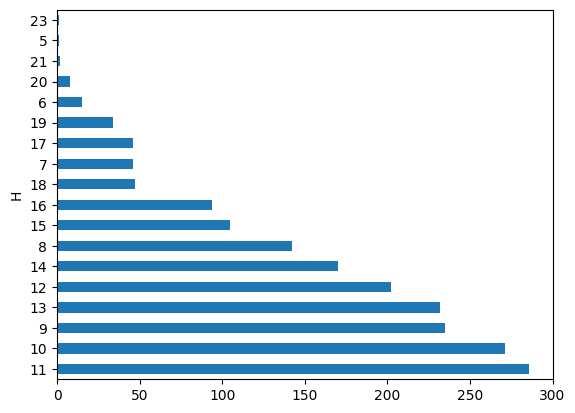

In [ ]:
#Visualizamos y tratamos de agrupar intervalos con mayor cantidad de llamdas
dt['H'].value_counts().plot(kind='barh')

Vemos que hay entre tres a cinco niveles de afluencia. A continuación proponemos algunos tiempos y su cantidad de tiempo que abarcarian.

4 niveles:
- [5-6,20-23] (2h,4h)     
- [7,17-19] (1h,3h)
- [8,14-16] (1h,3h)
- [9-13] (5h)

3 niveles:
- [5-6,20-23] (2,4h)     
- [7-8,15-19] (2h,5h)     
- [9-14] (6h)


2 niveles:
- [9-14] (6h)   
- Resto de horas

## Decisión Horarios

Tras segregar la información de las llamdas en los distintas propuestas arriba, se llevo cada una de las alternativas a pruebas de hipotesis com el objetivo de obtener un horario con distintas distribuciones/parametros de llegada. Sin embargo, ninguna de las alternativas probadas ajustaba correctamente alguna distribución (problema que ya tenia de base la base de llamadas completa).

Dado los bastos rechazos de hipótesis en los casos, sumado al hecho de buscar consistencia en el armado del modelo ARENA "original", se decidió optar por el mismo camino referente a horarios de los agente. Es decir, se tomo la desición guiado por la parsimonia de que tanto los agentes como llegadas de llamadas se guiaran bajo un horario de supuesto comportamiento único a lo largo del dia. Por lo que la info. final utilizadad para modelar el comportamiento de la llegada de llamadas fue la de la diferencias finales exportadas en lineas arriba y denominadas como "Tiempos llamadas"

# Conversión de Tiempos
Procedimiento para la obtención de los datos finales que se sometieron a pruebas de hipótesis

In [ ]:
uploaded = files.upload()
df = pd.read_excel("DB_FFinal.xlsx")
len(df)

Saving DB_FFinal.xlsx to DB_FFinal.xlsx


1845

In [ ]:
#Convertimos todas las variables para poder utilizarlas en Imput Analizer
dx = df.copy()
dx['Tiempo IVR'] = pd.to_timedelta(dx['Tiempo IVR']).dt.total_seconds()
dx['Tiempo en cola'] = pd.to_timedelta(dx['Tiempo en cola']).dt.total_seconds()
dx['Tiempo llamada'] = pd.to_timedelta(dx['Tiempo llamada']).dt.total_seconds()
dx['Hora de abandono'] = dx['Hora de abandono'].apply(convert_to_seconds)
dx['Tiempo encuesta'] = dx['Tiempo encuesta'].apply(convert_to_seconds)

In [ ]:
tit = ['Mesas', 'Agente','Tiempo IVR', 'Tiempo llamada', 'Hora de abandono','Tiempo encuesta', 'Disposiciones', 'Fecha de inicio','Fecha de Contestar']
title = ['Mesas', 'Agente','Tiempo IVR', 'Tiempo llamada', 'Hora de abandono','Tiempo encuesta', 'Disposiciones', 'Fecha de inicio','Fecha de Contestar', 'Completed Date']
aux= df[tit]
aux[['Día', 'Hora inicio', 'th']] = aux['Fecha de inicio'].str.split(' ', expand=True)
aux = aux.drop(['th', 'Hora inicio'], axis=1)
aux.head(1)

<ipython-input-72-7508daa01f6f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aux[['Día', 'Hora inicio', 'th']] = aux['Fecha de inicio'].str.split(' ', expand=True)
<ipython-input-72-7508daa01f6f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aux[['Día', 'Hora inicio', 'th']] = aux['Fecha de inicio'].str.split(' ', expand=True)
<ipython-input-72-7508daa01f6f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

,Mesas,Agente,Tiempo IVR,Tiempo llamada,Hora de abandono,Tiempo encuesta,Disposiciones,Fecha de inicio,Fecha de Contestar,Día
0,NaN,NaN,00:00:05,00:00:00,00:00:00,00:00:00,NaN,10/28/2024 05:49:53 AM,NaN,10/28/2024


In [ ]:
#Visualizamos la distribución de datos que tenemos por día
aux['Día'].value_counts()

,count
Día,
10/28/2024,553
10/29/2024,513
10/30/2024,477
10/31/2024,305


In [ ]:
#Anexamos el día mejor apoyo en una exploración de datos centrada en horarios/días
dy = dx[title]
dy['Dia'] = aux['Día']
dy.head()

<ipython-input-74-7d3b2ef1005f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dy['Dia'] = aux['Día']


,Mesas,Agente,Tiempo IVR,Tiempo llamada,Hora de abandono,Tiempo encuesta,Disposiciones,Fecha de inicio,Fecha de Contestar,Completed Date,Dia
0,NaN,NaN,5.0,0.0,0.0,0.0,NaN,10/28/2024 05:49:53 AM,NaN,10/28/2024 05:49:58 AM,10/28/2024
1,NaN,NaN,3.0,0.0,0.0,0.0,NaN,10/28/2024 05:54:58 AM,NaN,10/28/2024 05:55:01 AM,10/28/2024
2,NaN,NaN,24.0,0.0,0.0,0.0,NaN,10/28/2024 06:04:03 AM,NaN,10/28/2024 06:04:27 AM,10/28/2024
3,NaN,NaN,7.0,0.0,0.0,0.0,NaN,10/28/2024 06:27:12 AM,NaN,10/28/2024 06:27:19 AM,10/28/2024
4,NaN,NaN,8.0,0.0,0.0,0.0,NaN,10/28/2024 06:28:45 AM,NaN,10/28/2024 06:28:53 AM,10/28/2024


In [ ]:
len(dy),len(aux)

(1848, 1848)

In [ ]:
dy.to_excel('DB_Seconds.xlsx', index=False)
files.download('DB_Seconds.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Parámetros
Procedimiento para la obtención de los parámetros de los cuadros de decisión en el modelo de ARENA

In [ ]:
uploaded = files.upload()
df = pd.read_excel("DB_FFinal.xlsx")

Saving DB_FFinal.xlsx to DB_FFinal (1).xlsx


In [ ]:
#Vemos el número de registros por cada mesa y gregamos columna con la proporción
conteo_mesas_total = pd.DataFrame(df['Mesas'].value_counts(dropna=False))
conteo_mesas_total['Proporcion'] = conteo_mesas_total['count'] / conteo_mesas_total['count'].sum()
conteo_mesas_total

,count,Proporcion
Mesas,,
CASIA - Mesa CAL,715,0.387534
NaN,624,0.338211
Voz CASIA - Mesa de Servicio,427,0.231436
Mesa Tecnica 2.0,79,0.042818


Ahora buscamos cuanta transferencias hay de mesa a mesa

In [ ]:
#Buscamos solo los registros que contienen la palabra 'transferencia' de la columna Disposiciones
data_transferencias = pd.DataFrame(
    df[['Mesas','Disposiciones']].loc[df['Disposiciones'].str.contains(
        'transferencia',case=False,na=False
        )].value_counts()
    ).sort_values(by='Mesas')

proporciones = np.array([])
#Analisis de mesa CASIA - Mesa CAL
proporciones = np.append(proporciones,[63/715,8/715])
#Analisis de mesa Mesa Tecnica 2.0
proporciones = np.append(proporciones,[3/79,3/79])

#Analisis de mesa Voz CASIA - Mesa de Servicio
proporciones = np.append(proporciones,[19/427,16/427])

#Añadimos columna de proporciones
data_transferencias['proporciones (Probabilidad de tranferencia)'] = proporciones
data_transferencias

count  \
Mesas                        Disposiciones                                             
CASIA - Mesa CAL             Transferencia a Mesa de Servicio                     63   
                             Transferencia a Mesa Técnica                          8   
Mesa Tecnica 2.0             Transferencia a Mesa de Control de Acceso Lógico      3   
                             Transferencia a Mesa de Servicio                      3   
Voz CASIA - Mesa de Servicio Transferencia a Mesa de Control de Acceso Lógico     29   
                             Transferencia a Mesa Técnica                         16   

                                                                               proporciones (Probabilidad de tranferencia)  
Mesas                        Disposiciones                                                                                  
CASIA - Mesa CAL             Transferencia a Mesa de Servicio                                                     0.088112  
                             Transferencia a Mesa Técnica                                                         0.011189  
Mesa Tecnica 2.0             Transferencia a Mesa de Control de Acceso Lógico                                     0.037975  
                             Transferencia a Mesa de Servicio                                                     0.037975  
Voz CASIA - Mesa de Servicio Transferencia a Mesa de Control de Acceso Lógico                                     0.044496  
                             Transferencia a Mesa Técnica                                                         0.037471

In [ ]:
#Ahora solo buscamos la proporción de llamadas que entraron a encuesta
data_llamada = df[df['Tiempo llamada'] != '00:00:00']
np.sum(data_llamada['Tiempo encuesta'] != '00:00:00')/data_llamada.shape[0]

0.08236272878535773